In [13]:
import os
os.chdir('/Users/pranityadav/Documents/AI-sales-forcast-dashboard')

In [27]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/Users/pranityadav/Documents/AI-sales-forcast-dashboard/data/raw_data.csv/sample_submission.csv')
df = pd.read_csv('/Users/pranityadav/Documents/AI-sales-forcast-dashboard/data/raw_data.csv/test.csv')
df = pd.read_csv('/Users/pranityadav/Documents/AI-sales-forcast-dashboard/data/raw_data.csv/train.csv')
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


,store,item,sales
count,913000.000000,913000.000000,913000.000000
mean,5.500000,25.500000,52.250287
std,2.872283,14.430878,28.801144
min,1.000000,1.000000,0.000000
25%,3.000000,13.000000,30.000000
50%,5.500000,25.500000,47.000000
75%,8.000000,38.000000,70.000000
max,10.000000,50.000000,231.000000


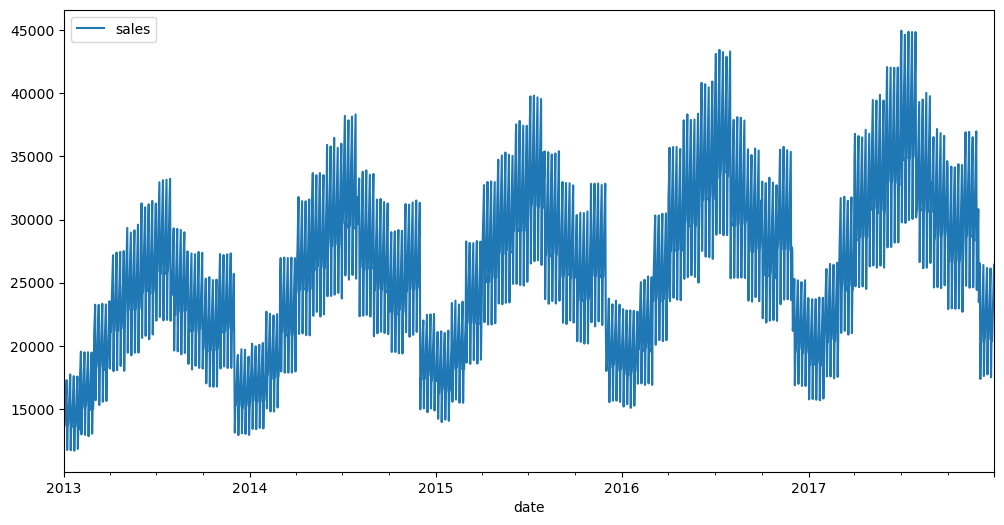

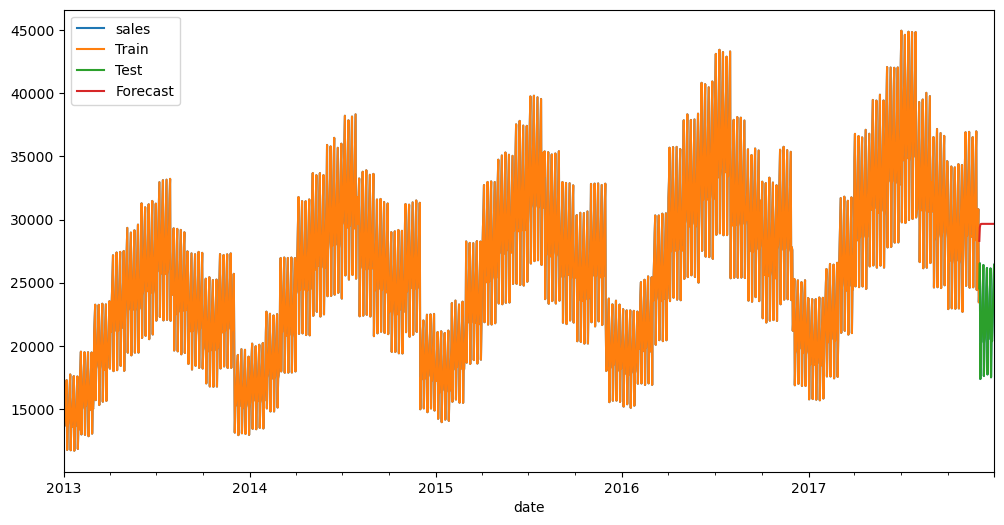

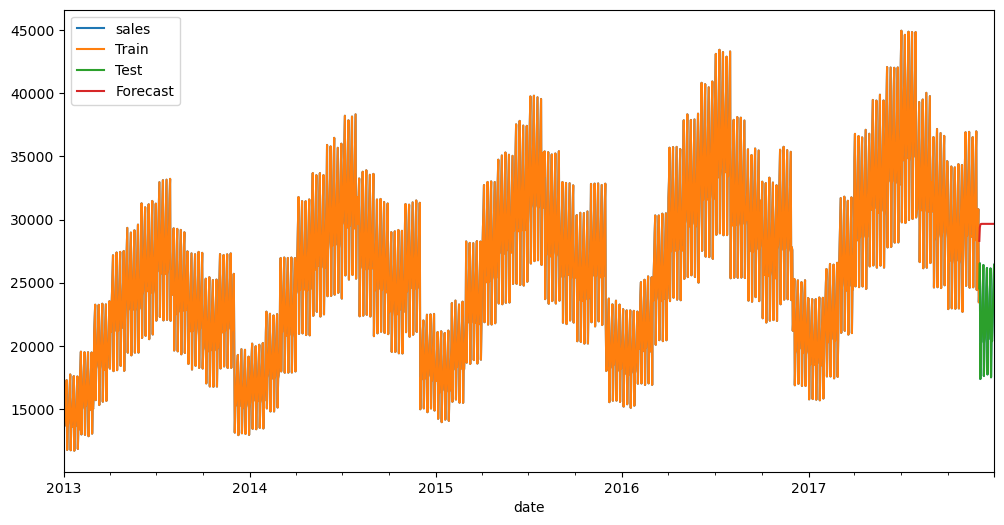

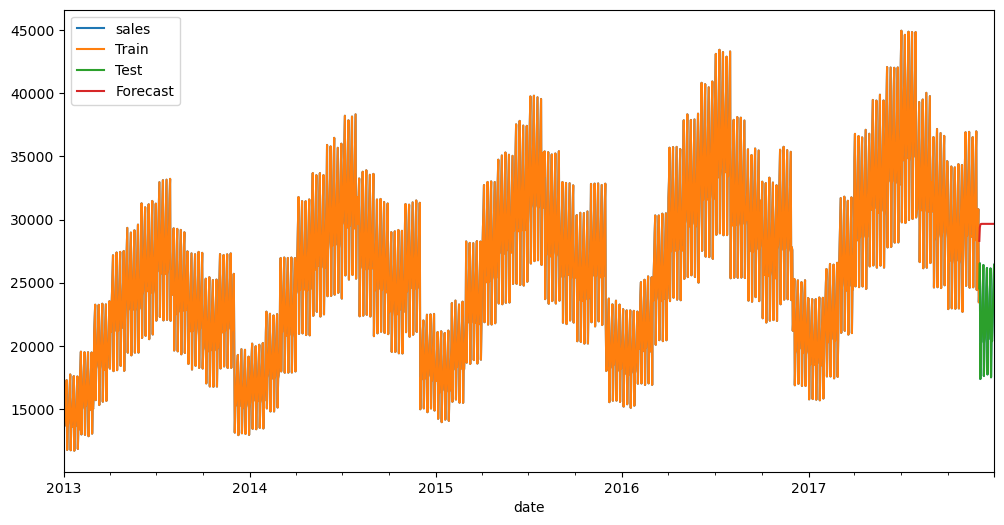

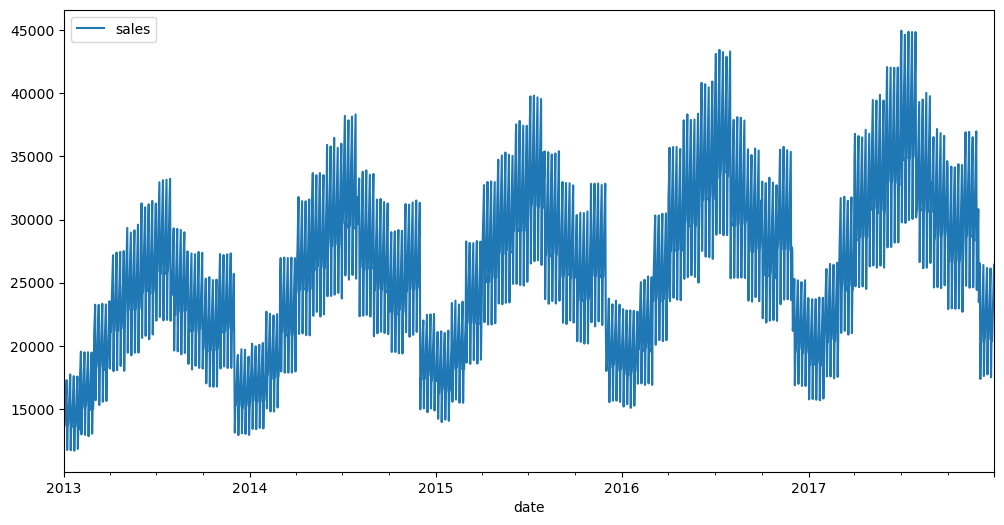

In [28]:
df['date'] = pd.to_datetime(df['date'])
df = df.groupby('date')['sales'].sum().reset_index()
df.plot(x='date', y='sales', figsize=(12,6))
plt.show()

MSE: 60156881.45643652


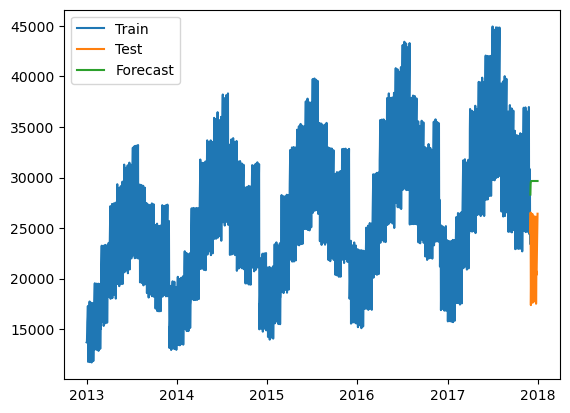

In [29]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Train-test split
train = df[:-30]
test = df[-30:]

# Fit ARIMA
model = ARIMA(train['sales'], order=(1,1,1))
model_fit = model.fit()
forecast = model_fit.forecast(steps=30)

# Evaluate
mse = mean_squared_error(test['sales'], forecast)
print(f'MSE: {mse}')

# Plot
plt.plot(train['date'], train['sales'], label='Train')
plt.plot(test['date'], test['sales'], label='Test')
plt.plot(test['date'], forecast, label='Forecast')
plt.legend()
plt.show()

In [30]:
result_df = df.copy()
result_df['forecast'] = np.nan
result_df.loc[result_df.index[-30]:, 'forecast'] = forecast.values

In [32]:
result_df.to_csv('../data/cleaned_data_with_forcast.csv', index=False)

In [33]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../data/cleaned_data_with_forcast.csv')
df.columns=df.columns.str.strip().str.lower()
print(df.columns.tolist())
st.title("AI-Powered Sales Forecasting Dashboard")

filtered_df=df.copy()
st.line_chart(filtered_df[['date', 'forecast']].set_index('date'))

2025-07-24 11:44:36.727 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-24 11:44:36.728 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-24 11:44:36.754 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-24 11:44:36.754 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


['date', 'sales', 'forecast']


DeltaGenerator()

In [34]:
st.download_button("Download forecast", df.to_csv().encode(), file_name='forecast.csv')

2025-07-24 11:53:48.473 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-24 11:53:48.474 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-24 11:53:48.475 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-24 11:53:48.475 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-24 11:53:48.476 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-24 11:53:48.476 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


False